#EfficientNet Inference in Keras

In [0]:
!pip install efficientnet

In [0]:
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## EfficientNet Model Size

1. EfficientNet-B0: 20.8 MB
2. EfficientNet-B1: 30.7 MB
3. EfficientNet-B2: 35.7 MB
4. EfficientNet-B3: 47.8 MB

Let's go for the smallest model of the above 4 : **EfficienNet-B0**.

In [0]:
from efficientnet import EfficientNetB0

In [0]:
model = EfficientNetB0(weights='imagenet')

W0701 03:55:41.854610 139951651768192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 03:55:41.909897 139951651768192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 03:55:41.919556 139951651768192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/efficientnet/initializers.py:30: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0701 03:55:41.975130 139951651768192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0701 03:55:41.980821 139951651768192 depre

21856256/21849008 [==============================] - 0s 0us/step


In [0]:
# Download the test image
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg

--2019-07-01 03:55:53--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2019-07-01 03:55:53--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.04s   

2019-07-01 03:55:54 (3.01 MB/s) - ‘panda.jpg’ saved [116068/116068]



In [0]:
# Import image transformations
from efficientnet import center_crop_and_resize, preprocess_input

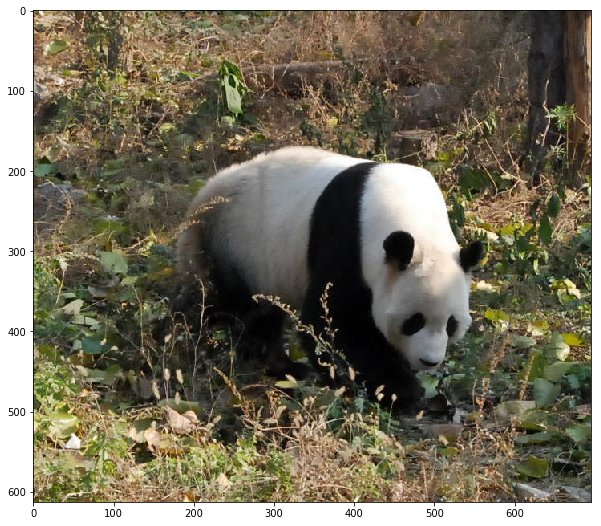

In [0]:
image = plt.imread('panda.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [0]:
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

40960/35363 [==================================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.8347929),
  ('n02134084', 'ice_bear', 0.0156020615),
  ('n02509815', 'lesser_panda', 0.004553518),
  ('n02133161', 'American_black_bear', 0.0024719085),
  ('n02132136', 'brown_bear', 0.002070759)]]

# ResNet50 in Keras

In [0]:
# Import required modules
from keras.applications.resnet50 import ResNet50

In [0]:
model = ResNet50(weights='imagenet')

W0701 04:09:44.433862 139951651768192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



102858752/102853048 [==============================] - 1s 0us/step


In [0]:
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

[[('n01930112', 'nematode', 0.029634755),
  ('n03729826', 'matchstick', 0.028414724),
  ('n03657121', 'lens_cap', 0.022990918),
  ('n04153751', 'screw', 0.022090413),
  ('n02783161', 'ballpoint', 0.021520559)]]

Now that we know how to run inference on both models, let's start off with our testing. For the testing, we will use **`time`** module to keep a track of time taken for inference. Since we are using the same module for image pre-processing, we will not take it into consideration and only stick to inference time. We will run the inference 1000 times and take an average of all the times.

In [0]:
import time

In [0]:
# First let's initialize our lists of inference times
efficientNetTimeInference = []
resNetTimeInference = []

In [0]:
# Preprocess image in advance
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

In [0]:
resNet = ResNet50(weights='imagenet')
efficientNet = EfficientNetB0(weights='imagenet')

In [0]:
for i in range(100):
  print("Iteration Number: {}".format(str(i).zfill(3)))
  startTime = time.time()
  # First, EfficientNet-B0
  y = efficientNet.predict(x)
  efficientNetTimeInference.append(time.time()-startTime)
  # Next, ResNet50
  startTime = time.time()
  y = resNet.predict(x)
  resNetTimeInference.append(time.time()-startTime)

Iteration Number: 000
Iteration Number: 001
Iteration Number: 002
Iteration Number: 003
Iteration Number: 004
Iteration Number: 005
Iteration Number: 006
Iteration Number: 007
Iteration Number: 008
Iteration Number: 009
Iteration Number: 010
Iteration Number: 011
Iteration Number: 012
Iteration Number: 013
Iteration Number: 014
Iteration Number: 015
Iteration Number: 016
Iteration Number: 017
Iteration Number: 018
Iteration Number: 019
Iteration Number: 020
Iteration Number: 021
Iteration Number: 022
Iteration Number: 023
Iteration Number: 024
Iteration Number: 025
Iteration Number: 026
Iteration Number: 027
Iteration Number: 028
Iteration Number: 029
Iteration Number: 030
Iteration Number: 031
Iteration Number: 032
Iteration Number: 033
Iteration Number: 034
Iteration Number: 035
Iteration Number: 036
Iteration Number: 037
Iteration Number: 038
Iteration Number: 039
Iteration Number: 040
Iteration Number: 041
Iteration Number: 042
Iteration Number: 043
Iteration Number: 044
Iteration 

In [0]:
# Print average inference time
print("Average inference time for EfficientNet-B0: {}".format(np.mean(efficientNetTimeInference)))
print("Average inference time for ResNet50: {}".format(np.mean(resNetTimeInference)))

Average inference time for EfficientNet-B0: 0.1576129364967346
Average inference time for ResNet50: 0.30902464866638185


# EfficientNet Inference in PyTorch

In [0]:
# Load required modules
import json
from PIL import Image

import torch
from torchvision import transforms

# Load model from torch hub
model = torch.hub.load('rwightman/gen-efficientnet-pytorch', 'efficientnet_b0', pretrained=True)

Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0-d6904d92.pth" to /root/.cache/torch/checkpoints/efficientnet_b0-d6904d92.pth
100%|██████████| 21376958/21376958 [00:01<00:00, 18063640.04it/s]


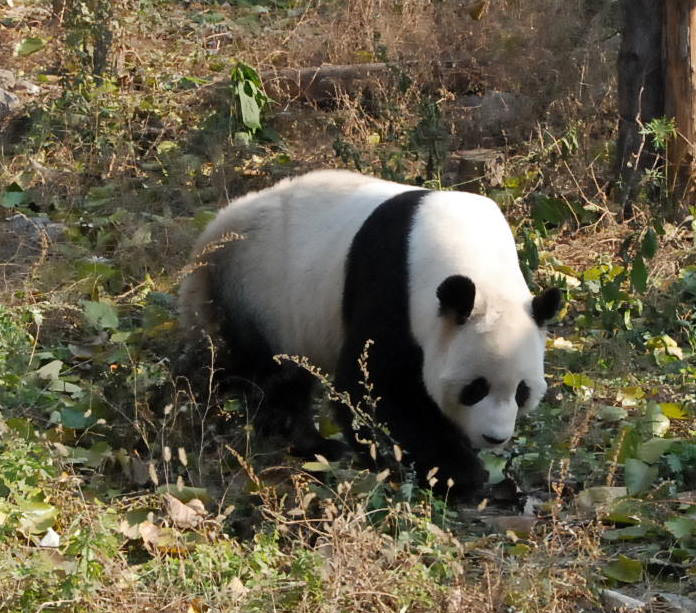

In [0]:
img = Image.open('panda.jpg')
img

In [0]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img = tfms(img).unsqueeze(0)

In [0]:
# Download labels file
!wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt

--2019-07-01 04:14:06--  https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31565 (31K) [text/plain]
Saving to: ‘labels_map.txt’

labels_map.txt      100%[===================>]  30.83K  --.-KB/s    in 0.01s   

2019-07-01 04:14:06 (2.46 MB/s) - ‘labels_map.txt’ saved [31565/31565]



In [0]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [0]:
model.eval()
with torch.no_grad():
    logits = model(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (90.13%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.52%)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.32%)
American black bear, black bear, Ursus americanus, Euarctos americanus      (0.10%)
soccer ball                                                                 (0.08%)


# ResNet50 Inference in PyTorch

In [0]:
# Load required modules
import torchvision.models as models
# Load pretrained model
resnet = models.resnet50(pretrained=True)

In [0]:
resnet.eval()
with torch.no_grad():
    logits = resnet(img)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()

for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (99.38%)
French bulldog                                                              (0.09%)
hog, pig, grunter, squealer, Sus scrofa                                     (0.04%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.03%)
soccer ball                                                                 (0.03%)


Now, as before, let's run a speed test to see how much time the inference takes for both the models.

In [0]:
# First let's initialize our lists of inference times
efficientNetTimeInference = []
resNetTimeInference = []

In [0]:
resNet = models.resnet50(pretrained=True)
efficientNet = torch.hub.load('rwightman/gen-efficientnet-pytorch', 'efficientnet_b0', pretrained=True)

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


In [0]:
for i in range(100):
  print("Iteration Number: {}".format(str(i).zfill(3)))
  startTime = time.time()
  # First, EfficientNet-B0
  efficientNet.eval()
  with torch.no_grad():
    logits = efficientNet(img)
  efficientNetTimeInference.append(time.time()-startTime)
  # Next, MobileNet
  startTime = time.time()
  resNet.eval()
  with torch.no_grad():
    logits = resNet(img)
  resNetTimeInference.append(time.time()-startTime)

Iteration Number: 000
Iteration Number: 001
Iteration Number: 002
Iteration Number: 003
Iteration Number: 004
Iteration Number: 005
Iteration Number: 006
Iteration Number: 007
Iteration Number: 008
Iteration Number: 009
Iteration Number: 010
Iteration Number: 011
Iteration Number: 012
Iteration Number: 013
Iteration Number: 014
Iteration Number: 015
Iteration Number: 016
Iteration Number: 017
Iteration Number: 018
Iteration Number: 019
Iteration Number: 020
Iteration Number: 021
Iteration Number: 022
Iteration Number: 023
Iteration Number: 024
Iteration Number: 025
Iteration Number: 026
Iteration Number: 027
Iteration Number: 028
Iteration Number: 029
Iteration Number: 030
Iteration Number: 031
Iteration Number: 032
Iteration Number: 033
Iteration Number: 034
Iteration Number: 035
Iteration Number: 036
Iteration Number: 037
Iteration Number: 038
Iteration Number: 039
Iteration Number: 040
Iteration Number: 041
Iteration Number: 042
Iteration Number: 043
Iteration Number: 044
Iteration 

In [0]:
# Print average inference time
print("Average inference time for EfficientNet-B0: {}".format(np.mean(efficientNetTimeInference)))
print("Average inference time for ResNet50: {}".format(np.mean(resNetTimeInference)))

Average inference time for EfficientNet-B0: 0.12161755561828613
Average inference time for ResNet50: 0.28322251319885255
